# Text Vectorization and Embedding 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

In [3]:
file=open('train_text.txt', 'r')
train_text=file.readlines()
file.close()
print(train_text)

['The future king is the prince\n', 'Daughter is the princess\n', 'Son is the prince\n', 'Only a man can be a king\n', 'Only a woman can be a queen\n', 'The princess will be a queen\n', 'The prince is a strong man\n', 'The princess is a beautiful woman\n', 'Prince is only a boy now\n', 'Prince will be king\n', 'A boy will be a man']


## Remove \n and make everything lowercase

In [4]:
for i in range(len(train_text)):
    train_text[i]=train_text[i].lower().replace('\n', '')
print(train_text)

['the future king is the prince', 'daughter is the princess', 'son is the prince', 'only a man can be a king', 'only a woman can be a queen', 'the princess will be a queen', 'the prince is a strong man', 'the princess is a beautiful woman', 'prince is only a boy now', 'prince will be king', 'a boy will be a man']


## Remove stopwords and tokenize each word

In [5]:
stop_words=['a', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'for', 'if', 'in',
            'into', 'is', 'it', 'no', 'not', 'of', 'on', 'or', 'such', 'that', 'the', 'their', 
            'then', 'there', 'these', 'they', 'this', 'to', 'was', 'will', 'with', 'only', 'now']

filtered_data=[]

for s in train_text:
    tmp=[]
    for w in s.split():
        if w not in stop_words:
            tmp.append(w)
    filtered_data.append(tmp)
    
print(filtered_data)    

[['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'can', 'king'], ['woman', 'can', 'queen'], ['princess', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man']]


## Bigrams

In [6]:
bigrams=[]
for i in filtered_data:
    for j in range(len(i)-1):
        for k in range(j+1, len(i)):
            bigrams.append([i[j], i[k]])
            bigrams.append([i[k], i[j]])
        
print(bigrams)

[['future', 'king'], ['king', 'future'], ['future', 'prince'], ['prince', 'future'], ['king', 'prince'], ['prince', 'king'], ['daughter', 'princess'], ['princess', 'daughter'], ['son', 'prince'], ['prince', 'son'], ['man', 'can'], ['can', 'man'], ['man', 'king'], ['king', 'man'], ['can', 'king'], ['king', 'can'], ['woman', 'can'], ['can', 'woman'], ['woman', 'queen'], ['queen', 'woman'], ['can', 'queen'], ['queen', 'can'], ['princess', 'queen'], ['queen', 'princess'], ['prince', 'strong'], ['strong', 'prince'], ['prince', 'man'], ['man', 'prince'], ['strong', 'man'], ['man', 'strong'], ['princess', 'beautiful'], ['beautiful', 'princess'], ['princess', 'woman'], ['woman', 'princess'], ['beautiful', 'woman'], ['woman', 'beautiful'], ['prince', 'boy'], ['boy', 'prince'], ['prince', 'king'], ['king', 'prince'], ['boy', 'man'], ['man', 'boy']]


In [7]:
words=[]
for grp in filtered_data:
    words.extend(grp)
words=list(set(words))
words.sort()
print(words)
print(len(words))

['beautiful', 'boy', 'can', 'daughter', 'future', 'king', 'man', 'prince', 'princess', 'queen', 'son', 'strong', 'woman']
13


## One Hot Encoding

In [8]:
#dict=pd.get_dummies(list(words), dtype=int)
#print(dict)

word_dict={}

counter=0
for w in words:
    word_dict[w]=counter
    counter+=1

print(word_dict)

{'beautiful': 0, 'boy': 1, 'can': 2, 'daughter': 3, 'future': 4, 'king': 5, 'man': 6, 'prince': 7, 'princess': 8, 'queen': 9, 'son': 10, 'strong': 11, 'woman': 12}


In [9]:
onehot_data=np.zeros((len(words), len(words)))
for i in range(len(words)):
    onehot_data[i][i]=1

onehot_dict={}
for i in range(len(words)):
    onehot_dict[words[i]]=onehot_data[i]
for w in words:
    print(w, ":", onehot_dict[w]) 

beautiful : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
boy : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
can : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
daughter : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
future : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
king : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
man : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
prince : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
princess : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
queen : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
son : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
strong : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
woman : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [10]:
X=[]
Y=[]
for bi in bigrams:
    X.append(onehot_dict[bi[0]])
    Y.append(onehot_dict[bi[1]])
X=np.array(X)
Y=np.array(Y)

## Training the neural network

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model=Sequential()

vocab_size=len(onehot_data[0])
embed_size=2

model.add(Input(shape=(vocab_size,)))
model.add(Dense(embed_size, activation="linear"))
model.add(Dense(vocab_size, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam")
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 2)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 13)             │            39 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67 (268.00 B)

 Trainable params: 67 (268.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [19]:
history=model.fit(X, Y, epochs=1000)

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5632 
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6101
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5921
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5920
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6366 
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6199
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6144
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5962
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5881
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5807
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5703
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6304 
Epoch 13/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6213
Epoch 14/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5969
Epoch 15/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.6163
Epoch 16/1000
2/

## Result

In [30]:
history.history.keys()

dict_keys(['loss'])

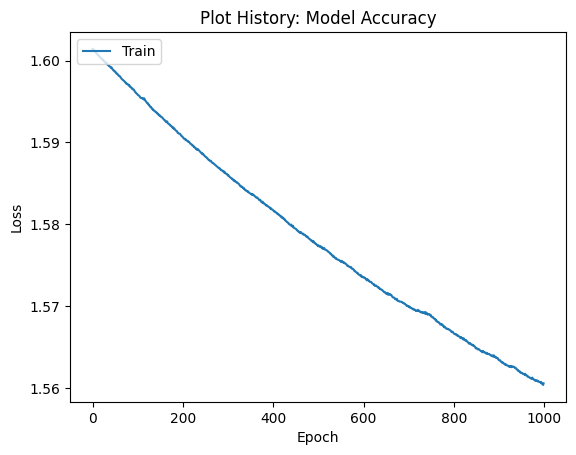

In [32]:
plt.plot(history.history['loss'], label='train')
plt.title('Plot History: Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [34]:
weights=model.get_weights()[0]
word_embeddings={}
for w in words:
    word_embeddings[w]=weights[word_dict[w]]
print(word_embeddings)

{'beautiful': array([ 1.5047579, -2.3846233], dtype=float32), 'boy': array([-3.0701516 , -0.91401875], dtype=float32), 'can': array([0.23842981, 0.19403581], dtype=float32), 'daughter': array([ 3.5645065, -3.0596917], dtype=float32), 'future': array([-1.1312288 ,  0.42913696], dtype=float32), 'king': array([-1.2006754 , -0.38079205], dtype=float32), 'man': array([-0.30060607,  0.9560348 ], dtype=float32), 'prince': array([-1.8823342,  1.9966576], dtype=float32), 'princess': array([2.6539311 , 0.22193141], dtype=float32), 'queen': array([ 0.82928205, -1.3315389 ], dtype=float32), 'son': array([-2.3538, -3.2216], dtype=float32), 'strong': array([-2.7046955, -0.9902541], dtype=float32), 'woman': array([1.7121694 , 0.00934027], dtype=float32)}


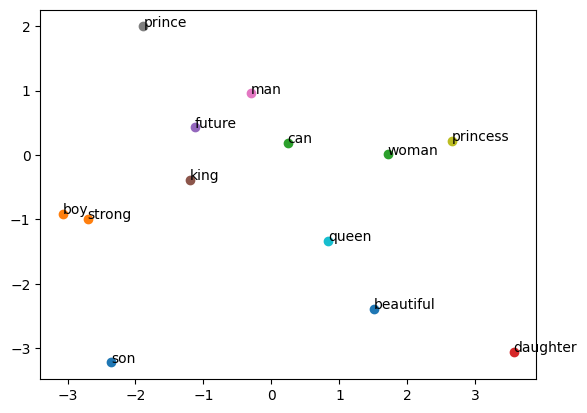

In [38]:
for word in list(word_dict.keys()):
    coord = word_embeddings.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))

plt.show()